<a href="https://colab.research.google.com/github/vedprakash226/VisionVerse/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import cv2

In [ ]:
uploaded = files.upload()

Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.jpg to 6.jpg
Saving boat.jpg to boat.jpg


In [ ]:
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')
img3 = cv2.imread('3.png')
img4 = cv2.imread('4.png')
img5 = cv2.imread('5.png')
img6 = cv2.imread('6.jpg')
images = [img1, img2, img3, img4, img5, img6]

boat = cv2.imread('boat.jpg')

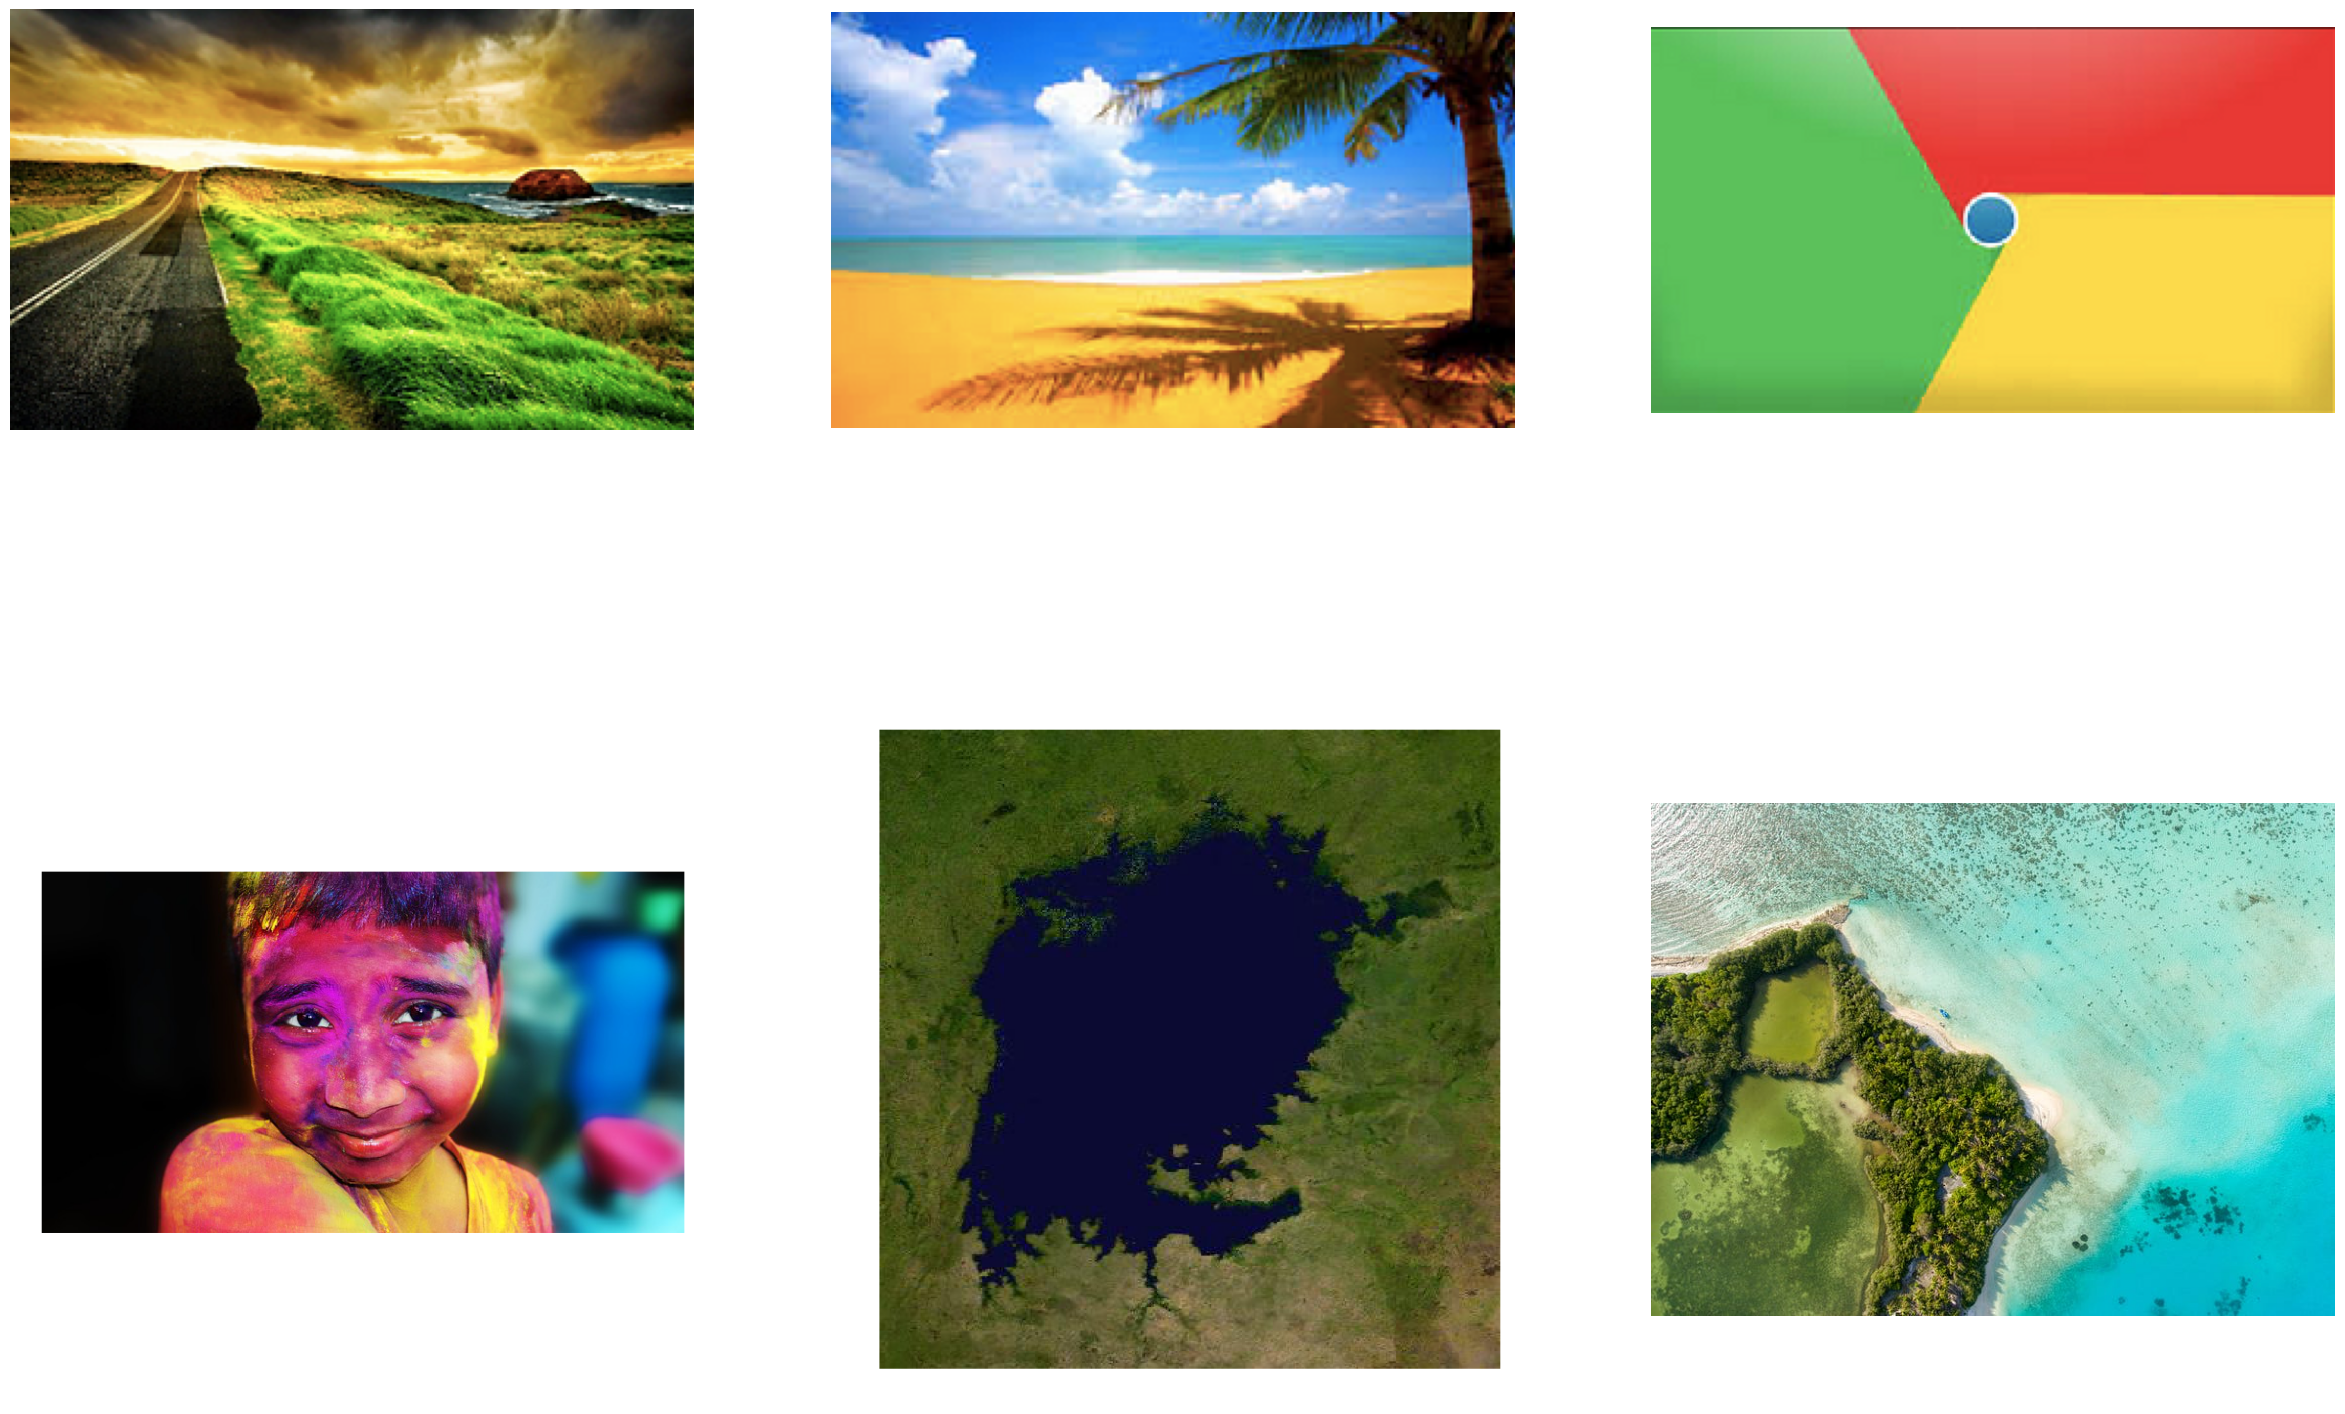

In [ ]:
plt.figure(figsize=(30,20))
for i in range(6):
    img = images[i]
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

plt.show()

# **Kmeans**

In [ ]:
def kMeans(img,k):
    data = np.float32(img.reshape((-1,3)))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    retval , labels, centers = cv2.kmeans(data, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    segmented_image = segmented_data.reshape((img.shape))

    plt.imshow(segmented_image)


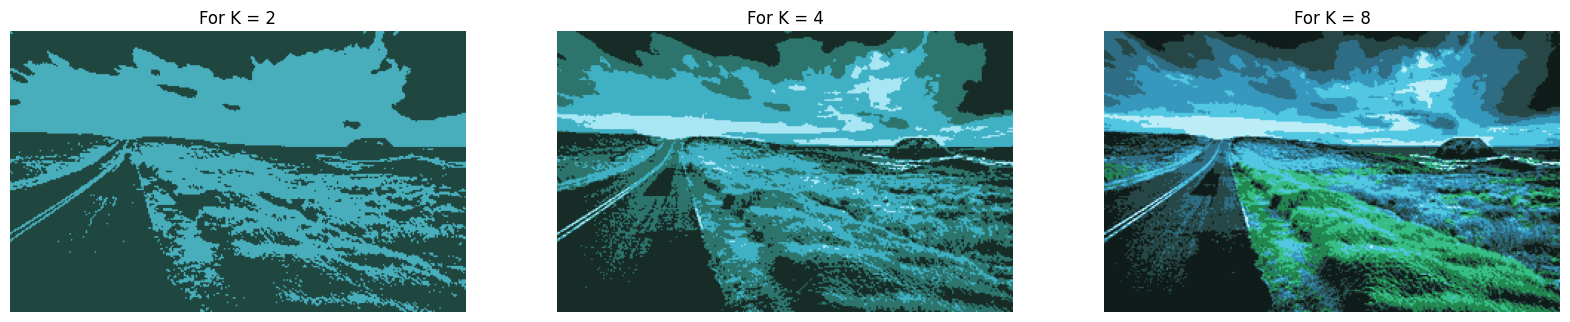

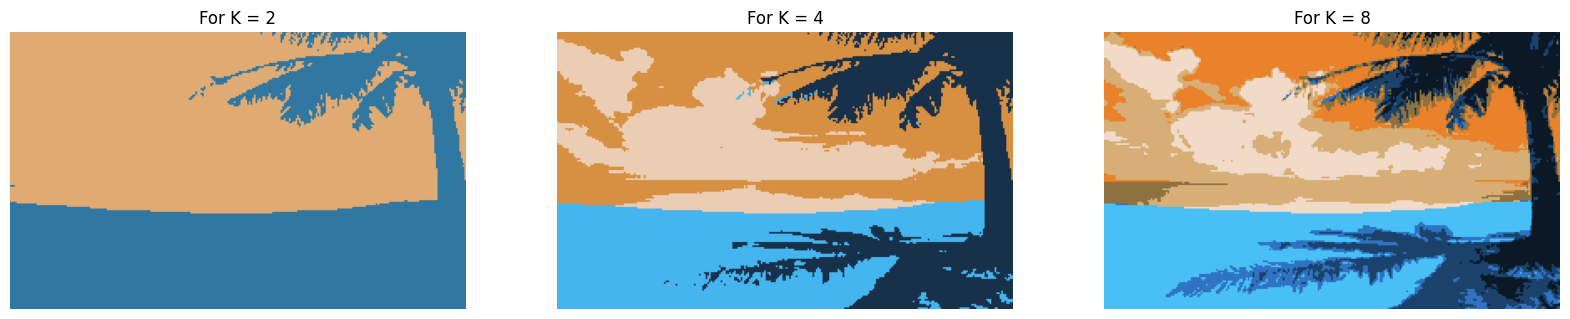

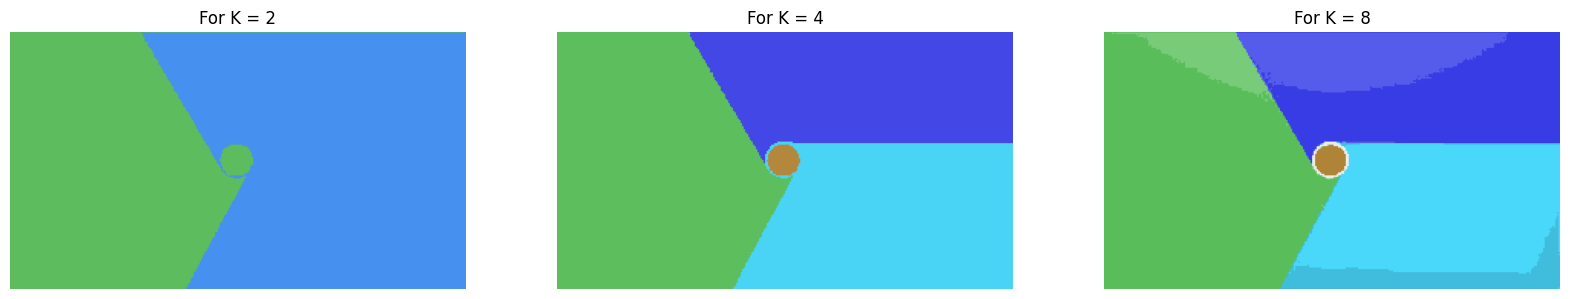

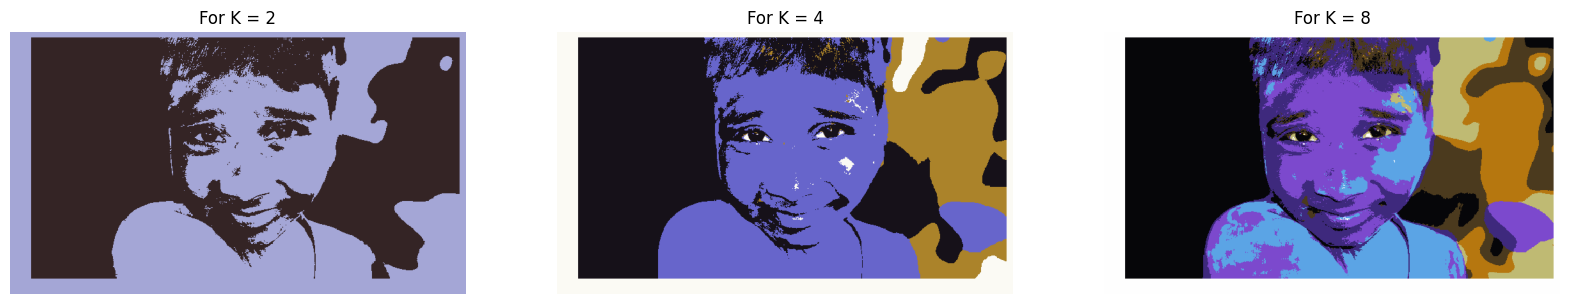

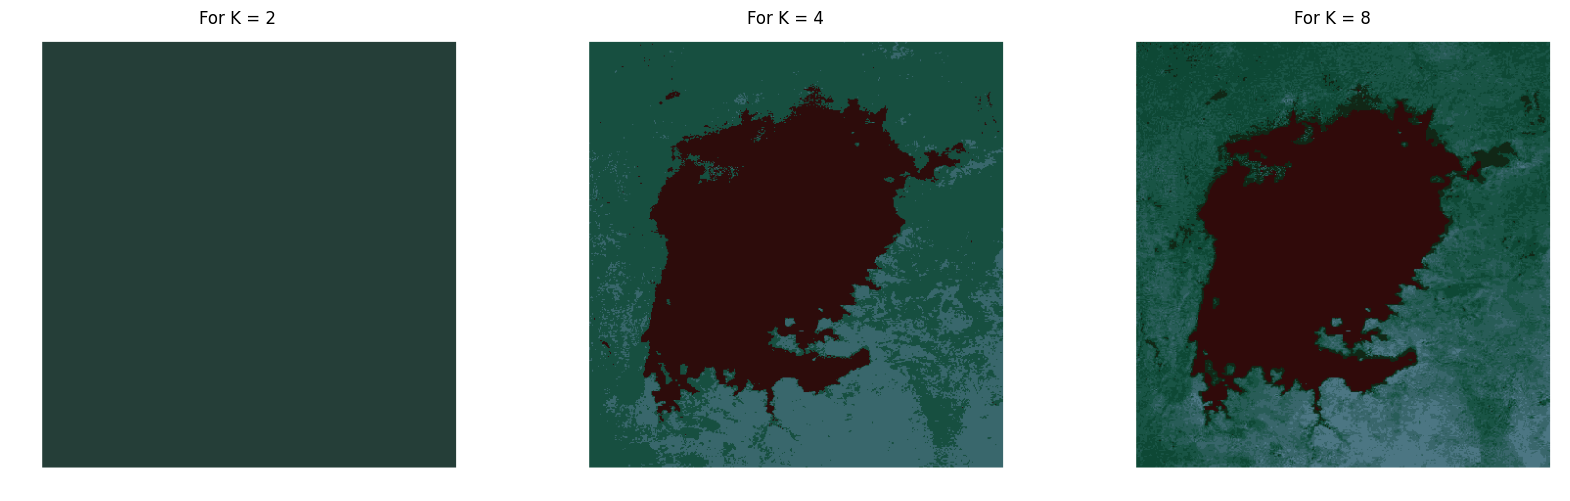

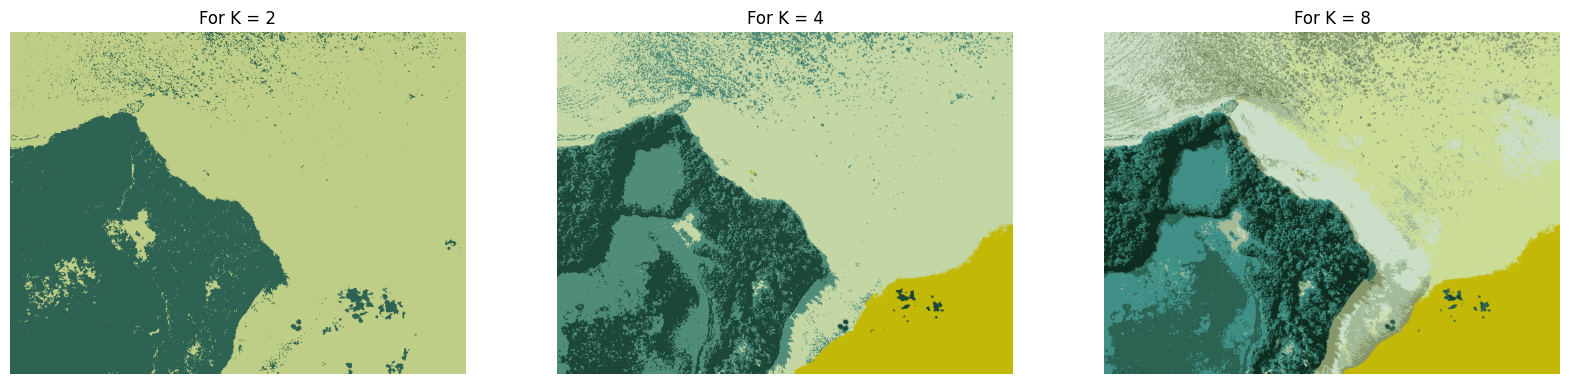

In [ ]:
for img in images:
    plt.figure(figsize=(20,25))

    plt.subplot(1,3,1)
    kMeans(img, 2)
    plt.axis("off")
    plt.title("For K = 2")

    plt.subplot(1,3,2)
    kMeans(img, 4)
    plt.axis("off")
    plt.title("For K = 4")

    plt.subplot(1,3,3)
    kMeans(img, 8)
    plt.axis("off")
    plt.title("For K = 8")

    plt.show()

# **Otsu thresholding and Normal threshold**

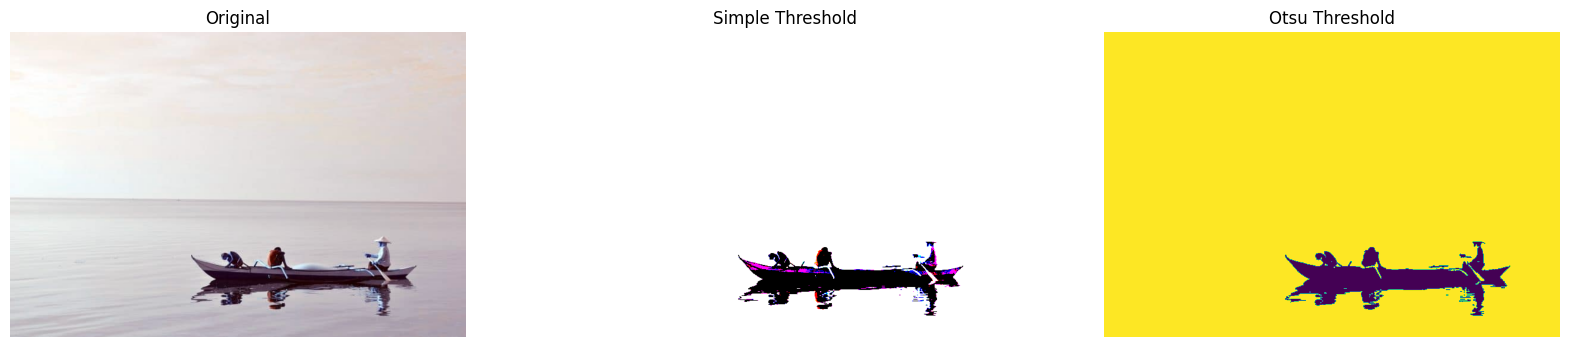

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(boat)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Simple Threshold")
plt.axis("off")
ret, t1 = cv2.threshold(boat, 110, 255, cv2.THRESH_BINARY)
plt.imshow(t1)

plt.subplot(1,3,3)
plt.title("Otsu Threshold")
plt.axis("off")
gray = cv2.cvtColor(boat, cv2.COLOR_BGR2GRAY)       #As otsu thresholding only works on the grayscale images
ret,t2 = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(t2)

plt.show()

In simple thresholding we have to assign the value of the threshold using the hit and try method and we cannot predict the most correct value.

While in the Otsu method It calculates for each and every possible value of the threshold and gives the best possible result.